<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>

# Data Science for Businnes

## Prof. Eduardo Pécora

## Elastic Net Regression
Tempo estimado: **60** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Aplicar a Elastic Net Regression
* Estimar erros para vários valores de $\lambda 1$ e $\lambda 2$

## Bibliotecas

In [4]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Obtendo dados

In [5]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv"

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)

#Obtendo colunas categóricas
cat = ['object']
df_cat = df.select_dtypes(include=cat)
df_cat

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [6]:
#Corrigindo problemas na feature 'make'
df_cat['make'] = df_cat['make'].replace({'bmw': 'BMW','doge':'dodge','volkswagen':'VW','volvo':'volv1'})

# Crie uma instância do codificador OneHotEncoder
encoder = OneHotEncoder()

# Ajuste e transforme os dados da coluna "make"
dummy_array = encoder.fit_transform(df_cat)

# Crie um DataFrame Pandas com as variáveis dummy
dummy_df = pd.DataFrame(dummy_array.toarray(), columns=encoder.get_feature_names_out())

# Concatene o DataFrame dummy com os outros dados
df_cat = pd.concat([df.drop(df.select_dtypes(include=cat).columns, axis=1), dummy_df], axis=1)

df_cat.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train Test Split

In [7]:
X = df_cat[df_cat.drop(labels='price',axis='columns').columns]
Y = df_cat['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print("Shape train = ",X_train.shape)
print("Shape test = ",X_test.shape)

Shape train =  (150, 74)
Shape test =  (51, 74)


## Elastic NET

Usa dois parâmetros

$alpha = a + b$ 

$l1_{ratio} = a / (a + b)$

O parâmetro L1_ratio do ElasticNet, é sempre entre 0 ≤ l1_ratio ≤ 1. 

* Para l1_ratio = 0, a penalização é uma penalização L2. 
* Para l1_ratio = 1, é uma penalização L1. 
* Para 0 < l1_ratio < 1, a penalização é uma combinação de L1 e L2.


In [8]:
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the regularization strength
elastic.fit(X_train, y_train)

# Exibindo o R^2
R2=elastic.score(X_test,y_test)

# Predict on the test set
y_pred_elastic = elastic.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_elastic)
mape = 100*mean_absolute_percentage_error(y_test, y_pred_elastic)
mse = mean_squared_error(y_test, y_pred_elastic)
rmse = np.sqrt(mse)

print(f"R2 SCORE: {R2:.4f}")
print(f"MAE SCORE: {mae:.4f}")
print(f"MAPE SCORE: {mape:.4f}")
print(f"MSE SCORE: {mse:.4f}")

R2 SCORE: 0.8089
MAE SCORE: 3028.6782
MAPE SCORE: 18.5106
MSE SCORE: 20618949.1275


## Escolhendo um Alpha com GRID Se

In [9]:
# Define the grid of hyperparameters (alpha and l1_ratio)
param_grid = {
    'alpha': [0, 0.1, 0.5, 1.0, 5.0, 10.0],
    'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=elastic, param_grid=param_grid, cv=5, scoring='r2')

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

print(best_model)

ElasticNet(alpha=0.1, l1_ratio=0.9)


In [10]:
# Print all the parameter combinations and their corresponding scores
print("\nAll combinations and their scores:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Parameters: {params}, Score: {mean_score:.3f}")


All combinations and their scores:
Parameters: {'alpha': 0, 'l1_ratio': 0}, Score: 0.809
Parameters: {'alpha': 0, 'l1_ratio': 0.1}, Score: 0.809
Parameters: {'alpha': 0, 'l1_ratio': 0.3}, Score: 0.809
Parameters: {'alpha': 0, 'l1_ratio': 0.5}, Score: 0.809
Parameters: {'alpha': 0, 'l1_ratio': 0.7}, Score: 0.809
Parameters: {'alpha': 0, 'l1_ratio': 0.9}, Score: 0.809
Parameters: {'alpha': 0, 'l1_ratio': 1.0}, Score: 0.809
Parameters: {'alpha': 0.1, 'l1_ratio': 0}, Score: 0.806
Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}, Score: 0.809
Parameters: {'alpha': 0.1, 'l1_ratio': 0.3}, Score: 0.816
Parameters: {'alpha': 0.1, 'l1_ratio': 0.5}, Score: 0.826
Parameters: {'alpha': 0.1, 'l1_ratio': 0.7}, Score: 0.839
Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}, Score: 0.859
Parameters: {'alpha': 0.1, 'l1_ratio': 1.0}, Score: 0.814
Parameters: {'alpha': 0.5, 'l1_ratio': 0}, Score: 0.763
Parameters: {'alpha': 0.5, 'l1_ratio': 0.1}, Score: 0.765
Parameters: {'alpha': 0.5, 'l1_ratio': 0.3}, Score: 0.77

Text(45000, 3.3e-05, 'SCORE: 0.808930')

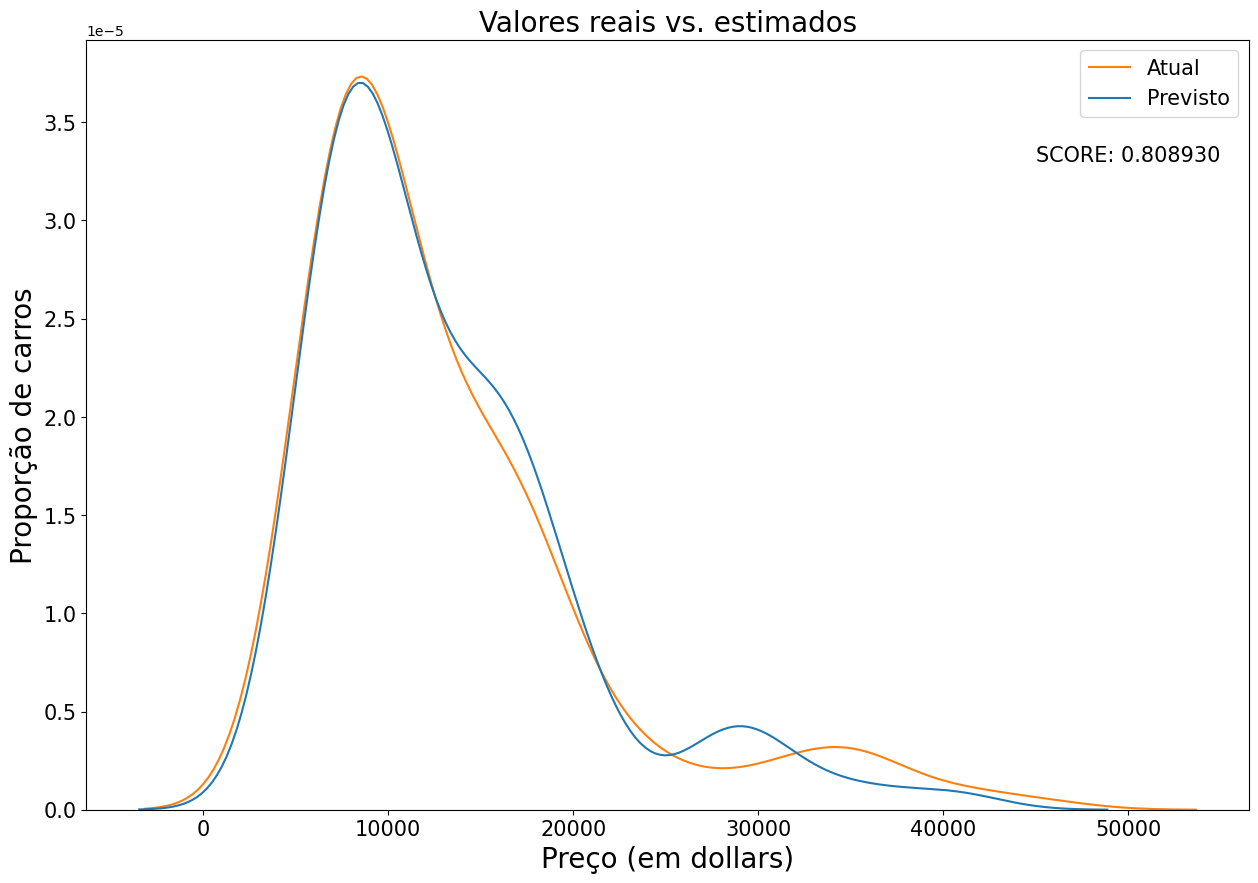

In [11]:
plt.figure(figsize=(15, 10))

#caso scaler tenha sido utilizado
#sns.kdeplot(data = [ridge.predict(scaler.transform(X)),df_cat['price']])
#caso contrário
sns.kdeplot(data = [grid_search.predict(X),df_cat['price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!

## Referências:

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação do método <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>train_test_split</a>
* Documentação do método <a href=https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ElasticNetCV.html>Elastic Net</a>


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel S. Botelho</a>


## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 22-04-2024       | 1.0   | Eduardo Pecora    | Estrutura Aula        |
| 09-10-2024       | 1.1   | João Gabriel S. Botelho    | Atualizações       |

## <h3 align="center"> (c) Liga Data Science / UFPR 2024. All rights reserved. <h3/>
